In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the 4 datastet 

cpu1k = pd.read_csv('cpu-1200.csv')
cpu12k = pd.read_csv('cpu-12000.csv')
gpu1k = pd.read_csv('gpu-1200.csv')
gpu12k = pd.read_csv('gpu-12000.csv')

In [3]:
# function to aggregate values
def pre_process(data, gpu=False):
    groupped_data = data.groupby(["size", "what"])
    
    result = groupped_data.agg(average_time=('time', 'mean'),
                               sd=('time', 'std'),
                               min_time=('time', 'min'),
                               max_time=('time', 'max')
                               ).reset_index()
    # gpu have 4 MPI processes per node
    if gpu:
        result['size'] = result['size'] / 4
    return result
    
cpu_1k = pre_process(cpu1k)
cpu_12k = pre_process(cpu12k)
gpu_1k = pre_process(gpu1k, gpu=True)
gpu_12k = pre_process(gpu12k, gpu=True)

## See the data: 

In [4]:
gpu_1k

,size,what,average_time,sd,min_time,max_time
0,1.0,computation,0.000272,0.000117,0.000190,0.000450
1,1.0,copy-matrix-cpu-to-gpu,0.001421,0.000108,0.001150,0.001503
2,1.0,copy-matrix-gpu-to-cpu,0.001647,0.000022,0.001617,0.001682
3,1.0,matrix-initialization,0.002361,0.000457,0.001759,0.003090
4,1.0,mpi-send-rec,0.021720,0.000227,0.021307,0.021957
5,2.0,computation,0.000294,0.000142,0.000171,0.000544
6,2.0,copy-matrix-cpu-to-gpu,0.001447,0.000625,0.000553,0.002106
7,2.0,copy-matrix-gpu-to-cpu,0.000742,0.000043,0.000677,0.000825
8,2.0,matrix-initialization,0.000933,0.000292,0.000377,0.001169
9,2.0,mpi-send-rec,0.035886,0.005884,0.025731,0.044504


In [5]:
cpu_12k

,size,what,average_time,sd,min_time,max_time
0,1,computation,3.387696,1.184053e-03,3.386329,3.388412
1,1,matrix-initialization,0.548171,6.192320e-04,0.547459,0.548587
2,1,mpi-send-rec,0.000009,9.537000e-07,0.000008,0.000010
3,2,computation,1.698216,4.212868e-03,1.694826,1.703727
4,2,matrix-initialization,0.274413,3.515100e-04,0.274081,0.274824
5,2,mpi-send-rec,0.027187,7.817804e-03,0.018550,0.036777
6,4,computation,0.849274,3.493031e-03,0.845166,0.853644
7,4,matrix-initialization,0.138222,1.528502e-03,0.137222,0.140450
8,4,mpi-send-rec,0.064144,4.667938e-03,0.057935,0.068995
9,8,computation,0.423967,1.902564e-03,0.420671,0.426271


In [6]:
gpu_1k

,size,what,average_time,sd,min_time,max_time
0,1.0,computation,0.000272,0.000117,0.000190,0.000450
1,1.0,copy-matrix-cpu-to-gpu,0.001421,0.000108,0.001150,0.001503
2,1.0,copy-matrix-gpu-to-cpu,0.001647,0.000022,0.001617,0.001682
3,1.0,matrix-initialization,0.002361,0.000457,0.001759,0.003090
4,1.0,mpi-send-rec,0.021720,0.000227,0.021307,0.021957
5,2.0,computation,0.000294,0.000142,0.000171,0.000544
6,2.0,copy-matrix-cpu-to-gpu,0.001447,0.000625,0.000553,0.002106
7,2.0,copy-matrix-gpu-to-cpu,0.000742,0.000043,0.000677,0.000825
8,2.0,matrix-initialization,0.000933,0.000292,0.000377,0.001169
9,2.0,mpi-send-rec,0.035886,0.005884,0.025731,0.044504


In [7]:
gpu_12k

,size,what,average_time,sd,min_time,max_time
0,1.0,computation,0.004522,0.000112,0.004438,0.004717
1,1.0,copy-matrix-cpu-to-gpu,0.082834,0.000817,0.081416,0.083911
2,1.0,copy-matrix-gpu-to-cpu,0.197495,0.001078,0.195649,0.199339
3,1.0,matrix-initialization,0.142993,0.000454,0.142481,0.143769
4,1.0,mpi-send-rec,0.040886,0.006247,0.032032,0.048701
5,2.0,computation,0.002422,0.000179,0.002265,0.002762
6,2.0,copy-matrix-cpu-to-gpu,0.042620,0.000666,0.041779,0.043837
7,2.0,copy-matrix-gpu-to-cpu,0.099114,0.000572,0.098238,0.100113
8,2.0,matrix-initialization,0.071648,0.000397,0.071003,0.072653
9,2.0,mpi-send-rec,0.054413,0.007518,0.047078,0.065482


# Plot the results

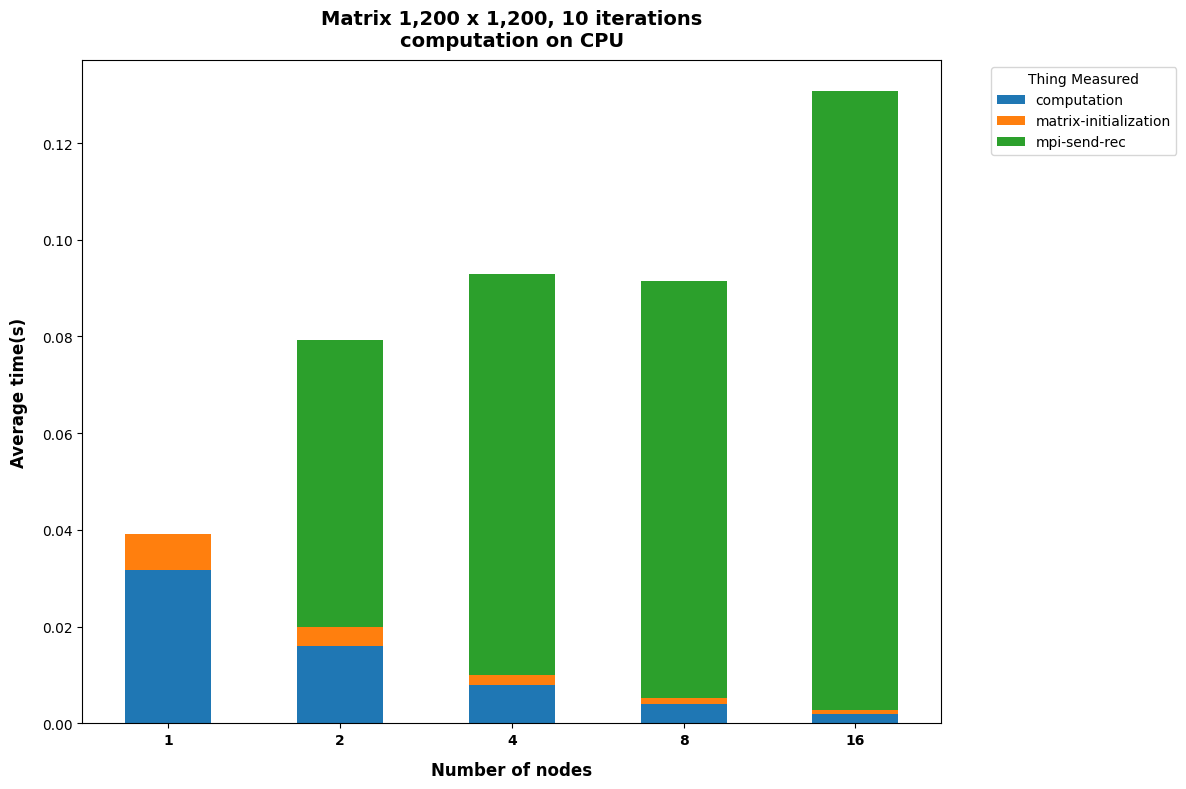

In [8]:
def plot_single_stack(data, title, ylim=None):
    extracted = data[["size", "what", "average_time"]]
    extracted.reset_index(drop=True, inplace=True)
    # pivot the table to perform the stacked bar plot
    pivot_df = extracted.pivot(index='size', columns='what', values='average_time')
    # plotting 
    ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8))
    ax.set_ylabel('Average time(s)', fontsize=12, fontweight='bold', labelpad=10)
    ax.set_xlabel('Number of nodes', fontsize=12, fontweight='bold', labelpad=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    plt.xticks(fontsize=10, fontweight='bold')
    if ylim:                    # for some plot auto scale crop the first column
        ax.set_ylim(ylim)
    ax.set_title(title, fontsize=14, fontweight='bold', pad=10)
    plt.legend(title='Thing Measured', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
plot_single_stack(cpu_1k, 'Matrix 1,200 x 1,200, 10 iterations\ncomputation on CPU') 

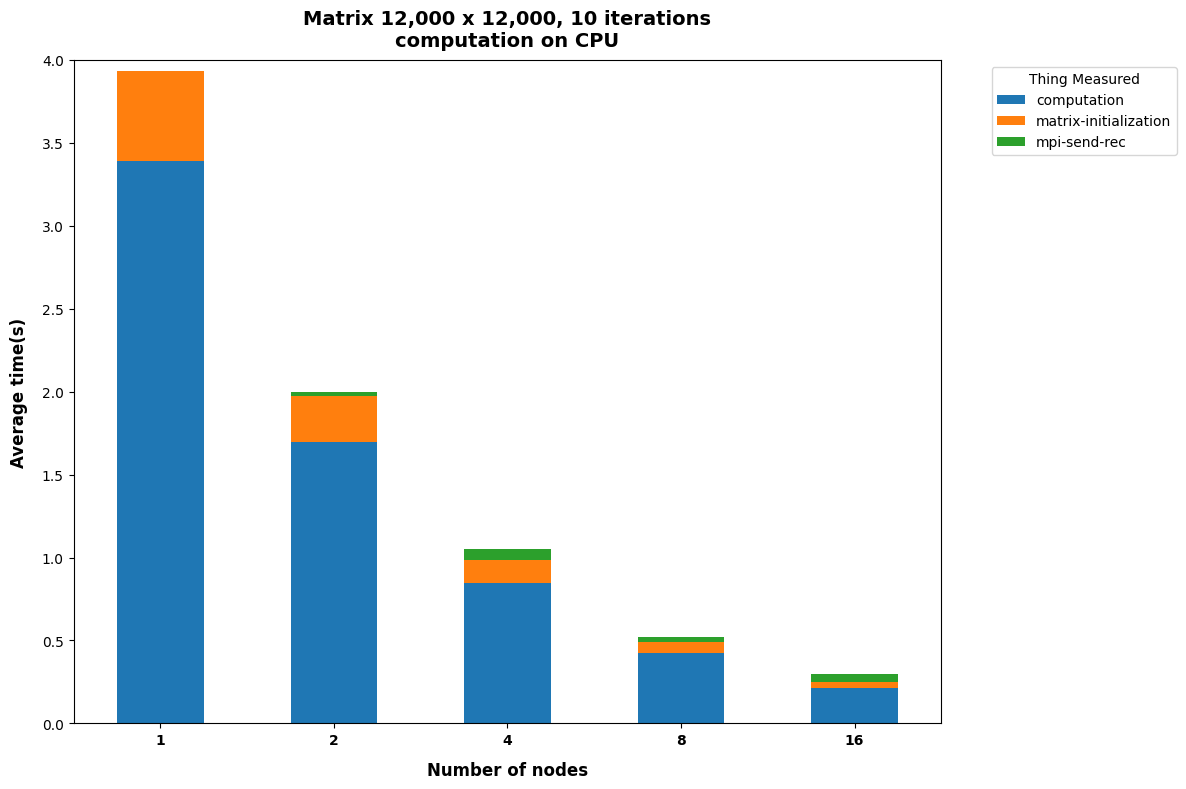

In [9]:
plot_single_stack(cpu_12k, 'Matrix 12,000 x 12,000, 10 iterations\ncomputation on CPU', ylim=(0, 4))

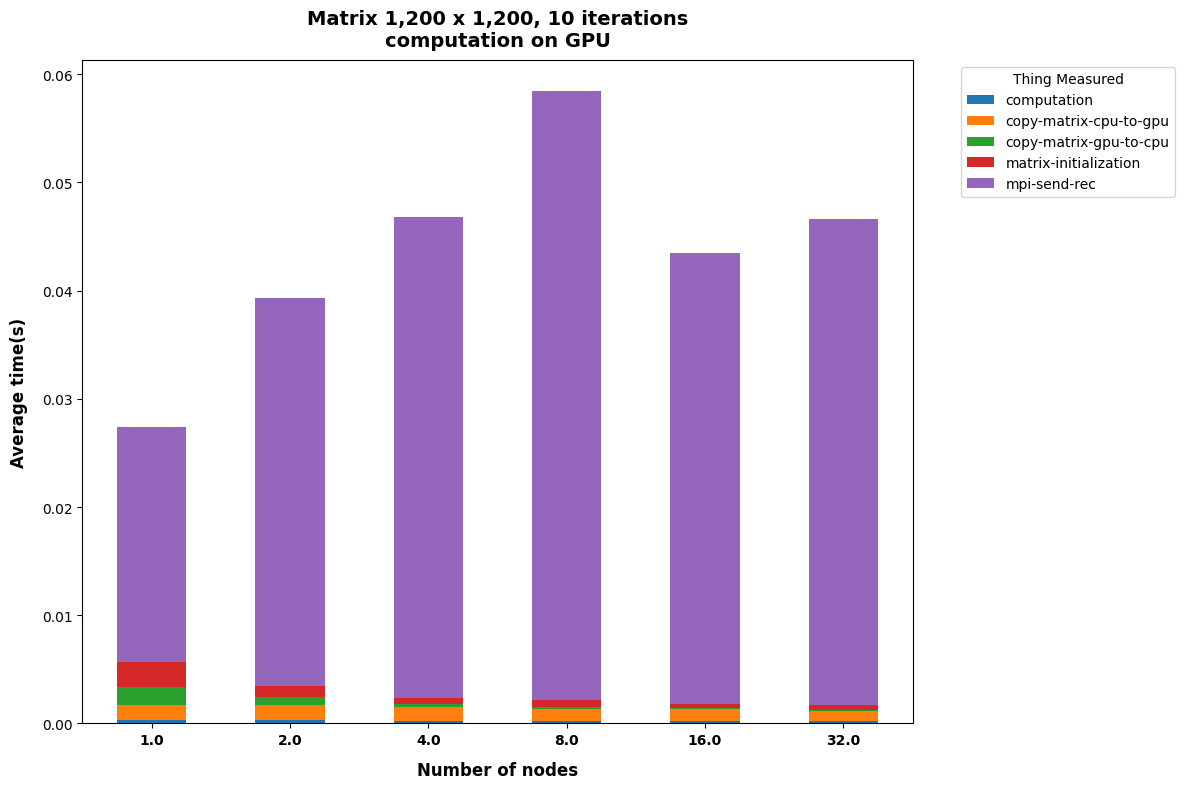

In [10]:
plot_single_stack(gpu_1k, 'Matrix 1,200 x 1,200, 10 iterations\ncomputation on GPU')

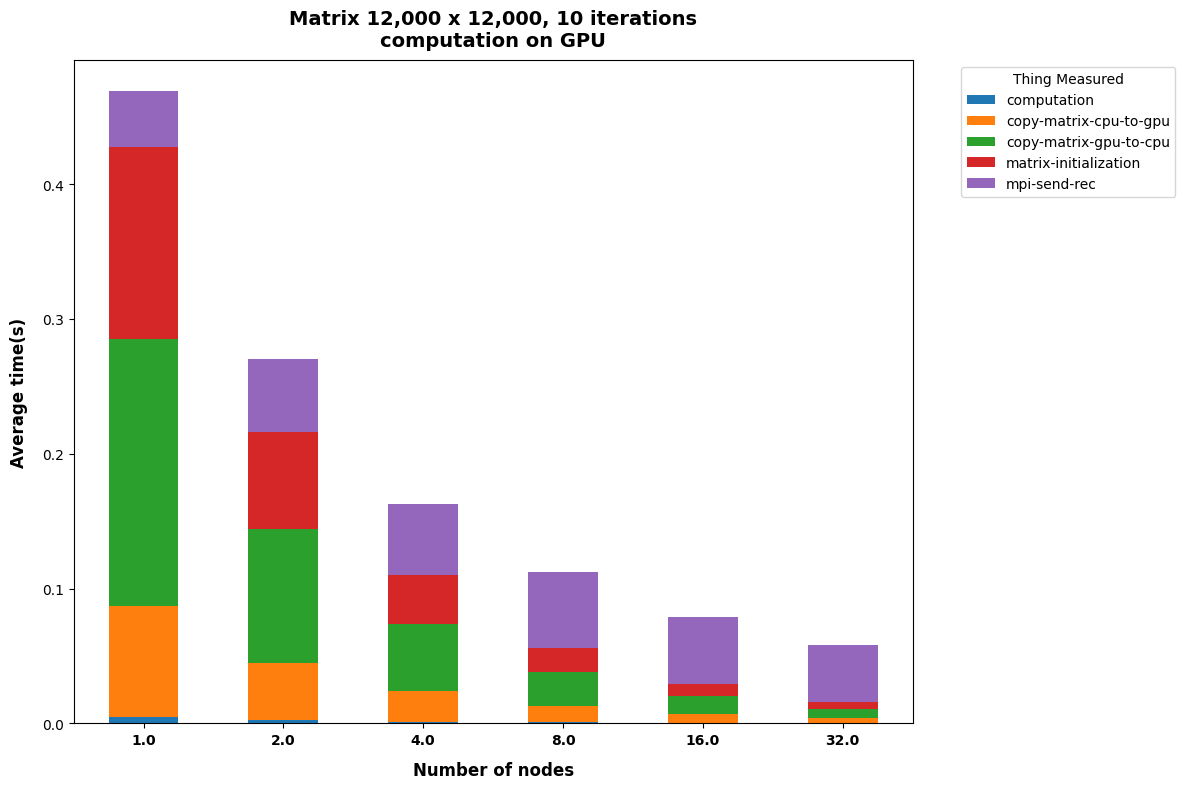

In [11]:
# plot_single_stack(gpu_12k, 'GPU 12000')
plot_single_stack(gpu_12k, 'Matrix 12,000 x 12,000, 10 iterations\ncomputation on GPU')

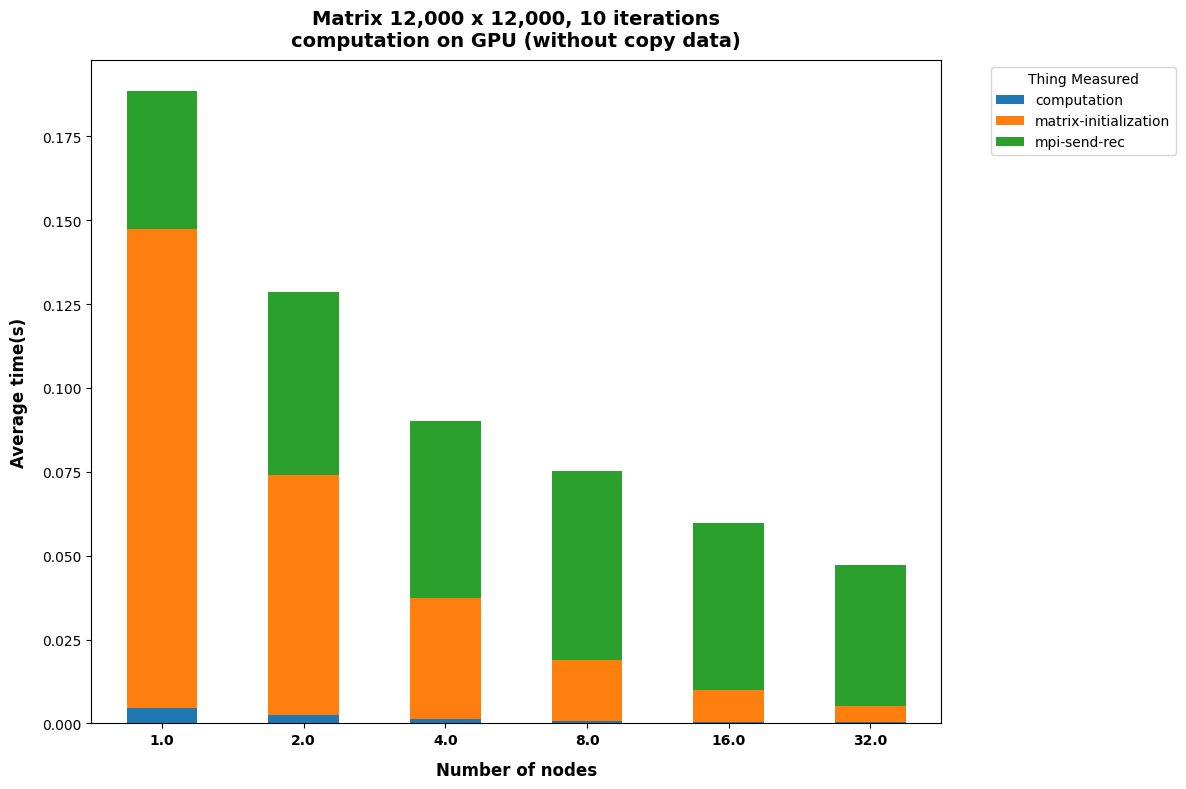

In [12]:
# plot as above, but remove from the dataset the rows of copy data from and to GPU
gpu_12k_nocopy = gpu_12k
# drop the rows with copy data
gpu_12k_nocopy = gpu_12k_nocopy[gpu_12k_nocopy['what'] != 'copy-matrix-cpu-to-gpu']
gpu_12k_nocopy = gpu_12k_nocopy[gpu_12k_nocopy['what'] != 'copy-matrix-gpu-to-cpu']
plot_single_stack(gpu_12k_nocopy, 'Matrix 12,000 x 12,000, 10 iterations\ncomputation on GPU (without copy data)')

### Some comparison

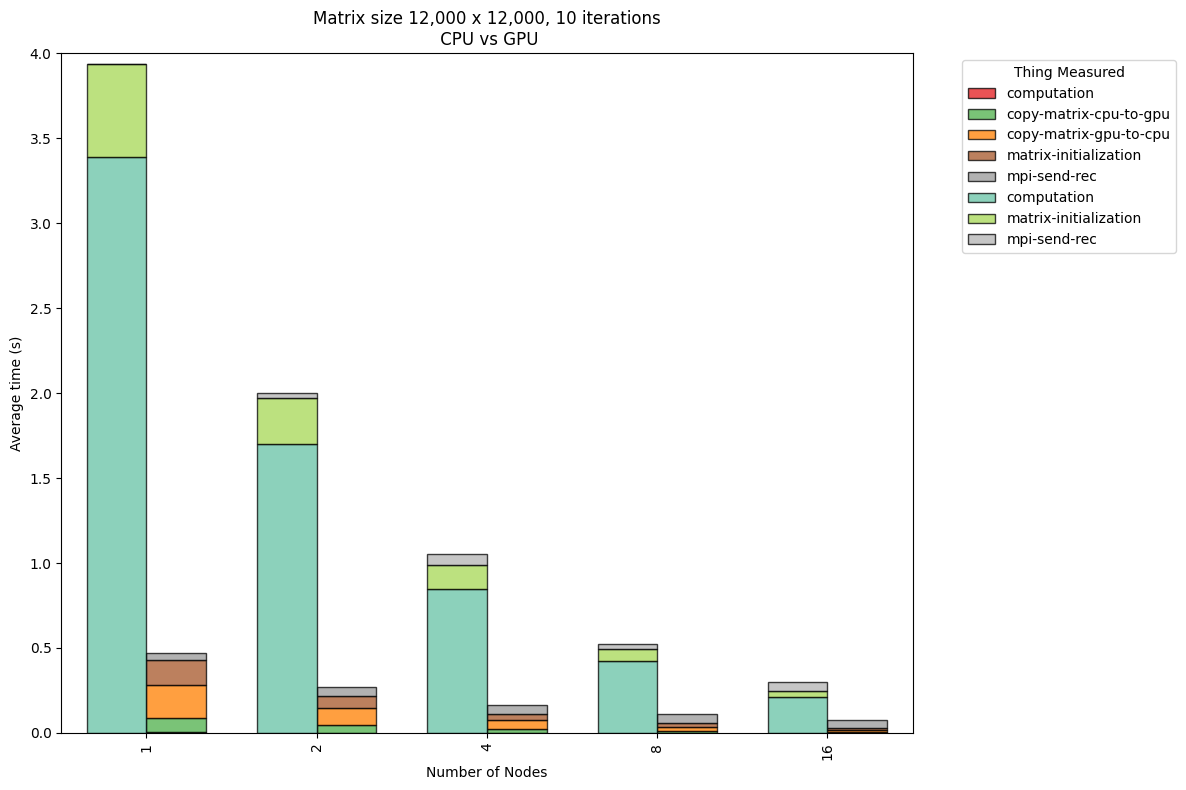

In [13]:
# plot the comparison between the two dataset, for the 12,000 matrix size

extracted_gpu = gpu_12k[["size", "what", "average_time"]]
extracted_cpu = cpu_12k[["size", "what", "average_time"]]
extracted_gpu.reset_index(drop=True, inplace=True)
extracted_cpu.reset_index(drop=True, inplace=True)

# pivot the table to perform the stacked bar plot
pivot_df_gp = extracted_gpu.pivot(index='size', columns='what', values='average_time')
pivot_df_cp = extracted_cpu.pivot(index='size', columns='what', values='average_time')

# plotting

fig, axs = plt.subplots(1, 1, figsize=(12, 8))
pivot_df_gp.plot(kind='bar', stacked=True, ax=axs, width=0.35, position=0, colormap='Set1', alpha=0.75, edgecolor='black')
pivot_df_cp.plot(kind='bar', stacked=True, ax=axs, width=0.35, position=1, colormap='Set2', alpha=0.75, edgecolor='black')

plt.xlim(-0.5, 4.5)
plt.ylim(0, 4)
plt.xlabel('Number of Nodes')
plt.ylabel('Average time (s)')
plt.title('Matrix size 12,000 x 12,000, 10 iterations\n CPU vs GPU')
plt.legend(title='Thing Measured', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

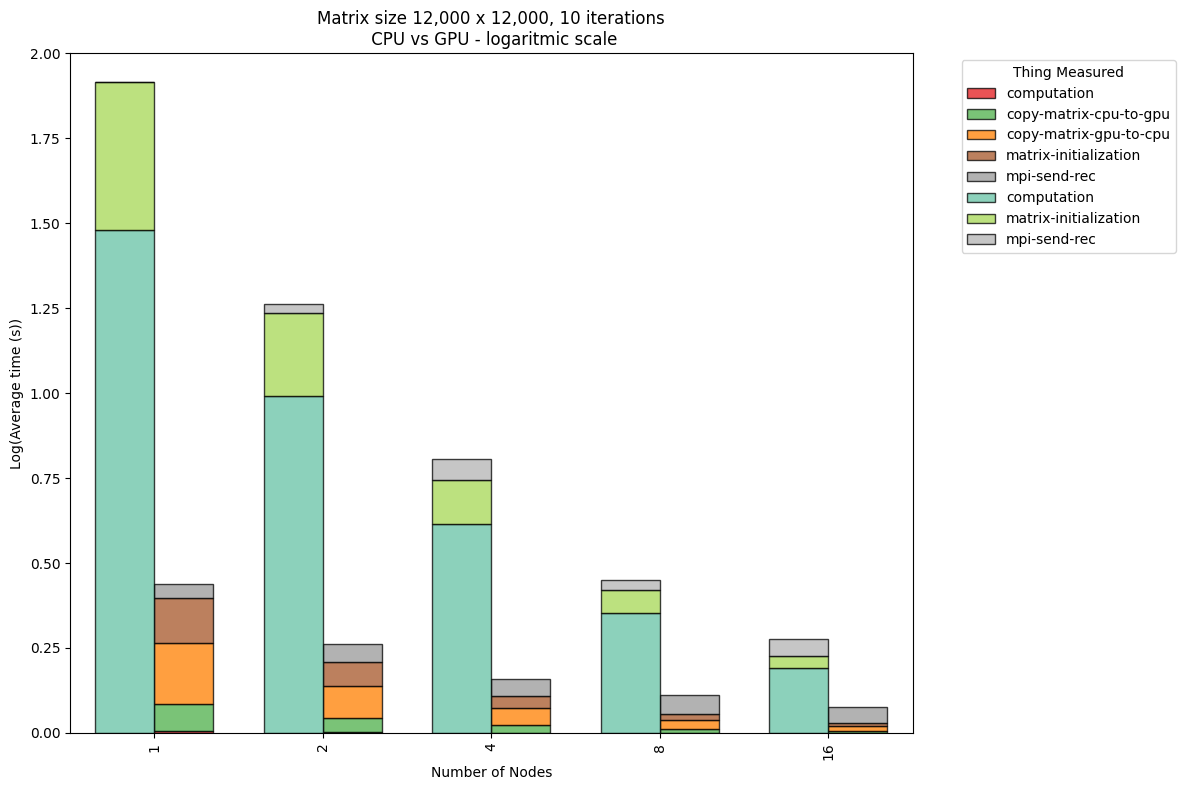

In [14]:
#same as above, but in logarithmic scale
extracted_cpu_log = extracted_cpu
extracted_gpu_log = extracted_gpu
# sum 1 to be sure to have only positive values
extracted_cpu_log.loc[:, 'average_time'] = np.log(extracted_cpu_log['average_time'] + 1)
extracted_gpu_log.loc[:, 'average_time'] = np.log(extracted_gpu_log['average_time'] + 1)

# pivot the table to perform the stacked bar plot
pivot_df_gp = extracted_gpu_log.pivot(index='size', columns='what', values='average_time')
pivot_df_cp = extracted_cpu_log.pivot(index='size', columns='what', values='average_time')

# plotting

fig, axs = plt.subplots(1, 1, figsize=(12, 8))
pivot_df_gp.plot(kind='bar', stacked=True, ax=axs, width=0.35, position=0, colormap='Set1', alpha=0.75, edgecolor='black')
pivot_df_cp.plot(kind='bar', stacked=True, ax=axs, width=0.35, position=1, colormap='Set2', alpha=0.75, edgecolor='black')

plt.xlim(-0.5, 4.5)
plt.ylim(0, 2)

plt.xlabel('Number of Nodes')
plt.ylabel('Log(Average time (s))')
plt.title('Matrix size 12,000 x 12,000, 10 iterations\n CPU vs GPU - logaritmic scale')
plt.legend(title='Thing Measured', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()